In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Input, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import random
import seaborn as sns
%matplotlib inline

In [2]:
!pip install pipreqsnb

In [4]:
# For creating requirements.txt file
!pipreqsnb ./

pipreqs  ./


INFO: Successfully saved requirements file in ./requirements.txt


## Data Preprocessing

In [3]:
#Read train data as dataframe
df_train = pd.read_csv('train.csv')

#Drop the labels for X
X_train_full = df_train.drop(['label'], axis=1)#.to_numpy()

#Put the labels into a numpy array
y_train_full = df_train['label']
y_full = y_train_full.to_numpy().reshape(72139, 1)

X_train_full.to_numpy().shape

(72139, 400)

In [4]:
X_train_full.describe()

,r0c0,r0c1,r0c2,r0c3,r0c4,r0c5,r0c6,r0c7,r0c8,r0c9,...,r19c10,r19c11,r19c12,r19c13,r19c14,r19c15,r19c16,r19c17,r19c18,r19c19
count,72139.000000,72139.000000,72139.000000,72139.000000,72139.000000,72139.000000,72139.000000,72139.000000,72139.000000,72139.000000,...,72139.000000,72139.000000,72139.000000,72139.000000,72139.000000,72139.000000,72139.000000,72139.000000,72139.000000,72139.000000
mean,36.125383,51.473308,70.855279,82.032354,86.869142,96.391730,101.608728,108.712333,115.257752,119.014680,...,107.758882,105.187416,101.996327,98.175689,94.994663,83.791611,79.024744,67.467084,49.497775,37.186349
std,70.769428,83.545299,93.468985,99.787787,100.295541,103.128587,104.129642,103.806258,106.480366,107.572306,...,107.891152,106.387324,102.402083,103.242319,102.317456,98.440790,97.781003,90.884177,82.706445,72.454911
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,1.000000,1.000000,2.000000,18.000000,33.000000,52.000000,67.000000,91.000000,96.000000,104.000000,...,73.000000,69.000000,73.000000,60.000000,52.000000,26.000000,7.000000,1.000000,1.000000,1.000000
75%,30.000000,80.000000,128.000000,171.000000,181.000000,208.000000,219.000000,226.000000,248.000000,255.000000,...,247.000000,236.000000,213.000000,207.000000,199.000000,172.000000,163.000000,128.000000,73.000000,24.000000
max,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


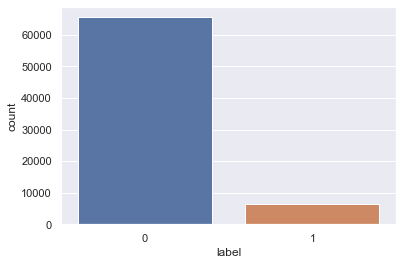

In [5]:
# Visualise the count of each class 
sns.set_theme()
ax = sns.countplot(x="label", data=df_train)

In [6]:
#Reshape X_train data into (20,20,1)
X_full = X_train_full.to_numpy().reshape(72139, 20, 20, 1)
X_full.shape

(72139, 20, 20, 1)

In [7]:
y_full

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

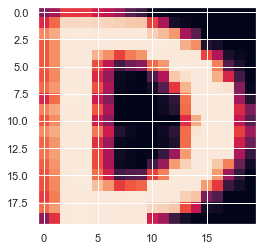

In [8]:
#Plot to visualise image
plt.imshow(X_full[8])

## Feature Engineering

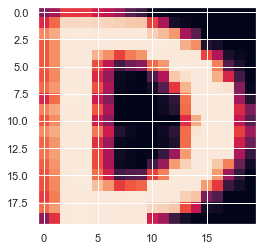

In [9]:
#Normalise the data to data with mean 0 and sd 1
X_full = X_full / 255.0
plt.imshow(X_full[8])

In [10]:
X_full[0]

array([[[0.00392157],
        [0.00392157],
        [0.00392157],
        [0.00392157],
        [0.10980392],
        [0.16862745],
        [0.20392157],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [0.31372549],
        [0.15294118],
        [0.00392157],
        [0.00392157],
        [0.00392157],
        [0.00392157],
        [0.00392157],
        [0.00392157]],

       [[0.00392157],
        [0.00392157],
        [0.00392157],
        [0.17647059],
        [0.76862745],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [0.94509804],
        [0.3372549 ],
        [0.21960784],
        [0.00392157],
        [0.00392157],
        [0.00392157],
        [0.00392157]],

       [[0.00392157],
        [0.00392157],
        [0.19607843],
        [0.76470588],
        [1.        ],
      

In [11]:
y_full.shape

(72139, 1)

## Data augmentation 

Using the image generator, we are not generating new data. We are only replacing the exisiting images by randomly shifting and rotating the images. This will help in reducing the variance of the model significantly

In [12]:
datagen = ImageDataGenerator(
        featurewise_center = False,  # set input mean to 0 over the dataset
        samplewise_center = False,  # set each sample mean to 0
        featurewise_std_normalization = False,  # normalization already done so false here
        samplewise_std_normalization = False,  
        zca_whitening = False,  # no ZCA whitening
        rotation_range = 20,  # randomly rotate images in the range of 20 degrees
        zoom_range = 0.2, # Randomly zoom image by factor 0.2
        width_shift_range = 0.2,  # randomly shift images horizontally 
        height_shift_range = 0.2,  # randomly shift images vertically 
        horizontal_flip = False,  # No random flip of images
        vertical_flip = False) 


## CNN Model 

Conv --> Conv --> BatchNorm --> Pool --> (Dropout) --> (Flatten) --> FullyConnected --> BatchNorm --> FullyConnected --> BatchNorm --> FullyConnected --> BatchNorm --> (Dropout) --> Softmax 

In [ ]:
def make_model():
    model = Sequential()

    # Layer 1
    model.add(Conv2D(filters = 32, kernel_size = 3, strides = 1, activation = 'relu', 
                        input_shape = (20,20,1), kernel_regularizer=tf.keras.regularizers.L2(0.0005)))

    # Layer 2
    model.add(Conv2D(filters = 32, kernel_size = 3, strides = 1, use_bias=False))

    # Layer 3
    #stabilize the network and make the learning algorithm converge faster
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Activation('relu'))
    model.add(MaxPooling2D(pool_size = 2, strides = 2))
    #randomly dropping 25% of the neurons
    model.add(Dropout(0.25))
    model.add(Flatten())

    # Layer 4
    model.add(Dense(units = 256, use_bias=False))

    # Layer 5
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Activation('relu'))

    # Layer 6
    model.add(Dense(units = 128, use_bias=False))

    # Layer 7
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Activation('relu'))

    # Layer 8
    model.add(Dense(units = 84, use_bias=False))

    # Layer 9
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Activation('relu'))
    model.add(Dropout(0.25))

    # Output using sigmoid to get output as probability  
    model.add(Dense(units = 1, activation = 'sigmoid'))

    model.compile(loss='binary_crossentropy',
                      optimizer='adam',
                      metrics=['accuracy', tf.keras.metrics.AUC()])
    return model

## Model Training

In [ ]:
# Function to oversample minority class 1 for train set only 
def oversample_train(X_train, y_train):
    df_new = pd.DataFrame(X_train.reshape(X_train.shape[0], 400))
    df_new['label'] = y_train
    df_1 = df_new[df_new['label'] == 1]
    df_1 = df_1.drop(['label'], axis=1).to_numpy().reshape(df_1.shape[0], 20, 20, 1)
    datagen.fit(df_1)
    X_train = np.vstack([X_train, df_1])
    for i in range(df_1.shape[0]):
        y_train = np.append(y_train, 1)
        
    return [X_train, y_train]

In [45]:
random.seed(1)

#Make learning rate variable 
variable_learning_rate = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor = 0.5, patience = 2)

#Use 5 different sets of Train/Validation split with 10 epochs each
sets = 5
ensemble_history = [0] * sets
ensemble_models = [0] * sets
for j in range(sets):
    print(f'Train/Validation Split : {j+1}')   
    X_train, X_val, y_train, y_val = train_test_split(X_full, y_full, test_size = 0.2)
    # Oversample for minority class 1 in train set
    oversample_train(X_train, y_train)
    # Use image generator to augment existing data in train set 
    datagen.fit(X_train)
    # Create a new model after every train/test split
    ensemble_models[j] = make_model()
    # Store the metrics to use for plotting 
    ensemble_history[j] = ensemble_models[j].fit(X_train, y_train,
                           epochs = 10, 
                           validation_data = (X_val,y_val), 
                           callbacks=[variable_learning_rate])

Train/Validation Split : 1
Epoch 1/10
1804/1804 [==============================] - 28s 15ms/step - loss: 0.1942 - accuracy: 0.9344 - auc_16: 0.8835 - val_loss: 0.1280 - val_accuracy: 0.9568 - val_auc_16: 0.9551
Epoch 2/10
1804/1804 [==============================] - 26s 14ms/step - loss: 0.1309 - accuracy: 0.9560 - auc_16: 0.9490 - val_loss: 0.1224 - val_accuracy: 0.9606 - val_auc_16: 0.9648
Epoch 3/10
1804/1804 [==============================] - 28s 15ms/step - loss: 0.1118 - accuracy: 0.9619 - auc_16: 0.9629 - val_loss: 0.0997 - val_accuracy: 0.9633 - val_auc_16: 0.9742
Epoch 4/10
1804/1804 [==============================] - 29s 16ms/step - loss: 0.0967 - accuracy: 0.9670 - auc_16: 0.9724 - val_loss: 0.0877 - val_accuracy: 0.9694 - val_auc_16: 0.9798
Epoch 5/10
1804/1804 [==============================] - 29s 16ms/step - loss: 0.0849 - accuracy: 0.9720 - auc_16: 0.9783 - val_loss: 0.0836 - val_accuracy: 0.9708 - val_auc_16: 0.9828
Epoch 6/10
1804/1804 [==============================]

Epoch 5/10
1804/1804 [==============================] - 35s 19ms/step - loss: 0.0885 - accuracy: 0.9693 - auc_20: 0.9783 - val_loss: 0.0817 - val_accuracy: 0.9717 - val_auc_20: 0.9810
Epoch 6/10
1804/1804 [==============================] - 35s 20ms/step - loss: 0.0804 - accuracy: 0.9715 - auc_20: 0.9823 - val_loss: 0.0791 - val_accuracy: 0.9718 - val_auc_20: 0.9767
Epoch 7/10
1804/1804 [==============================] - 34s 19ms/step - loss: 0.0742 - accuracy: 0.9735 - auc_20: 0.9839 - val_loss: 0.0652 - val_accuracy: 0.9762 - val_auc_20: 0.9862
Epoch 8/10
1804/1804 [==============================] - 34s 19ms/step - loss: 0.0644 - accuracy: 0.9779 - auc_20: 0.9878 - val_loss: 0.0807 - val_accuracy: 0.9747 - val_auc_20: 0.9750
Epoch 9/10
1804/1804 [==============================] - 35s 19ms/step - loss: 0.0601 - accuracy: 0.9780 - auc_20: 0.9900 - val_loss: 0.0754 - val_accuracy: 0.9744 - val_auc_20: 0.9823
Epoch 10/10
1804/1804 [==============================] - 35s 19ms/step - loss: 0

### Plot Loss, Accuracy and AUC 

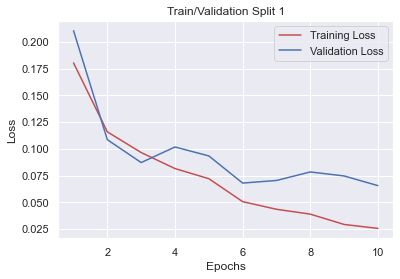

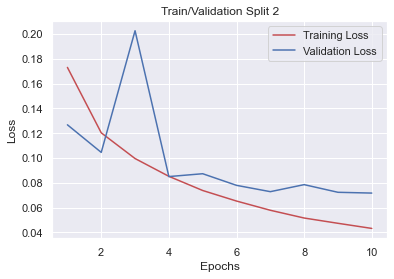

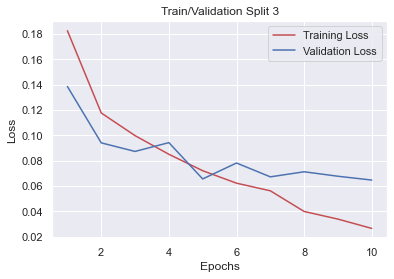

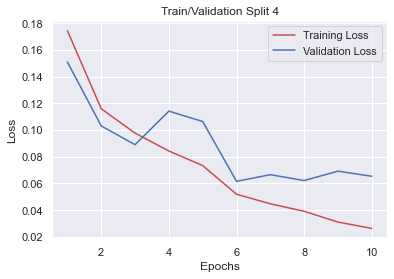

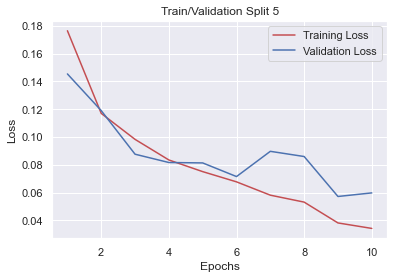

<Figure size 432x288 with 0 Axes>

In [35]:
#Plot the loss curve of Train and Validation for each epoch
for j in range(sets):
    loss=ensemble_history[j].history['loss']
    val_loss=ensemble_history[j].history['val_loss']
    epochs=range(1,11)
    plt.plot(epochs, loss, 'r', label = "Training Loss")
    plt.plot(epochs, val_loss, 'b', label = "Validation Loss")
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'Train/Validation Split {j+1}')
    plt.legend()
    plt.figure()

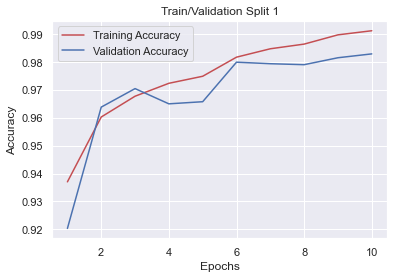

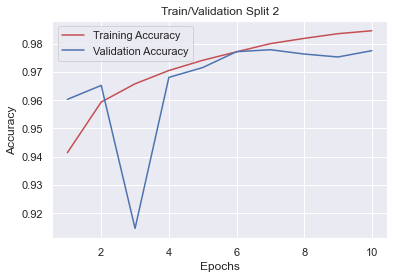

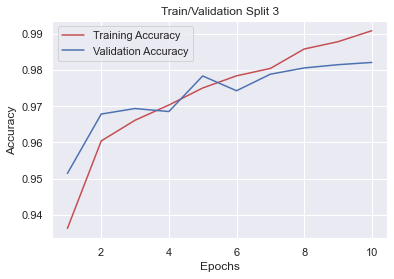

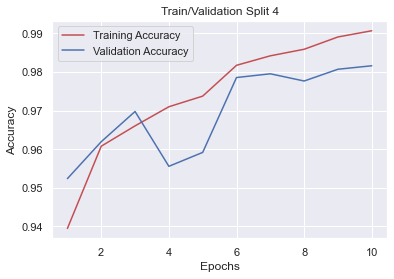

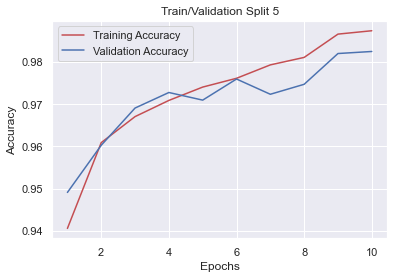

<Figure size 432x288 with 0 Axes>

In [36]:
# Plot Accuracy of Train and Validation for each epoch
for j in range(sets):
    acc=ensemble_history[j].history['accuracy']
    val_acc=ensemble_history[j].history['val_accuracy']
    epochs=range(1,11)
    plt.plot(epochs, acc, 'r', label = "Training Accuracy")
    plt.plot(epochs, val_acc, 'b', label = "Validation Accuracy")
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'Train/Validation Split {j+1}')
    plt.legend()
    plt.figure()

[0.9084400534629822, 0.9609612822532654, 0.9735322594642639, 0.9813656806945801, 0.9849725365638733, 0.9934051632881165, 0.9943496584892273, 0.9957458972930908, 0.9977549910545349, 0.9980291724205017]
[0.9109053015708923, 0.9585777521133423, 0.9713470935821533, 0.9782907366752625, 0.983900785446167, 0.987348198890686, 0.9895657300949097, 0.9922156929969788, 0.9931063652038574, 0.9944168329238892]
[0.9049893617630005, 0.9600512385368347, 0.9709430932998657, 0.9786553382873535, 0.985487699508667, 0.9882566928863525, 0.990658700466156, 0.9954115152359009, 0.99649977684021, 0.9980767369270325]
[0.9125803709030151, 0.9616745710372925, 0.9724010229110718, 0.9785058498382568, 0.9849674701690674, 0.9923939108848572, 0.9941131472587585, 0.9956220984458923, 0.9972487092018127, 0.9980344176292419]
[0.905890703201294, 0.9600812196731567, 0.9711370468139648, 0.980141282081604, 0.9835140705108643, 0.9861342906951904, 0.9906620979309082, 0.9918698668479919, 0.9956055283546448, 0.9966408610343933]


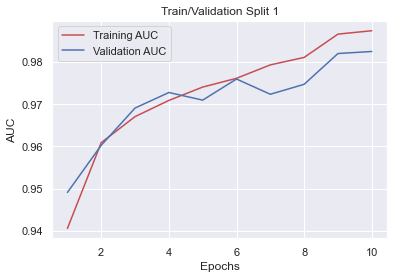

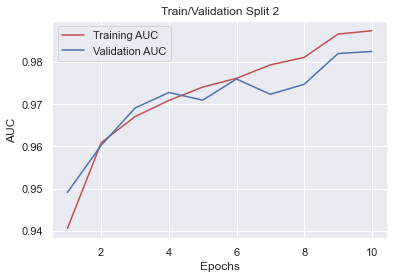

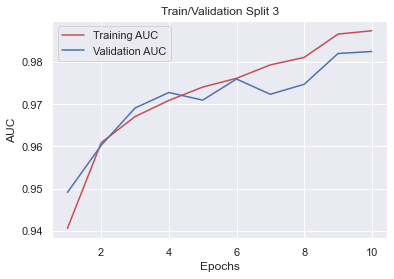

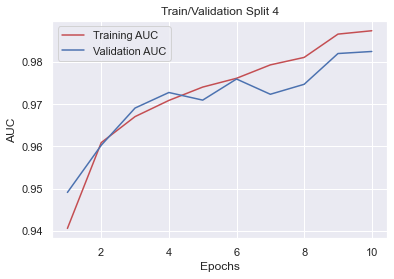

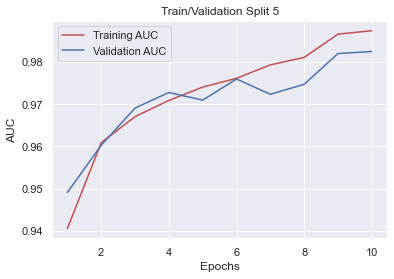

<Figure size 432x288 with 0 Axes>

In [40]:
# Plot AUC of Train and Validation for each epoch
for j in range(sets):
    x = j + 6
    # If keep running the model training code, auc stored wiil have different names 
    # ie. first run first train/test will be named auc, rerun first train/test will be named auc_6
    auc=ensemble_history[j].history['auc_'+str(x)] 
    print(auc)
    val_auc=ensemble_history[j].history['val_auc_'+str(x)]
    epochs=range(1,11)
    plt.plot(epochs, acc, 'r', label = "Training AUC")
    plt.plot(epochs, val_acc, 'b', label = "Validation AUC")
    plt.xlabel('Epochs')
    plt.ylabel('AUC')
    plt.title(f'Train/Validation Split {j+1}')
    plt.legend()
    plt.figure()

## Prepare test dataset

In [19]:
# Read test data in dataframe without ID
df_test = pd.read_csv('test.csv')
X_test = df_test.drop(['Id'], axis=1)
X_test.head()

,r0c0,r0c1,r0c2,r0c3,r0c4,r0c5,r0c6,r0c7,r0c8,r0c9,...,r19c10,r19c11,r19c12,r19c13,r19c14,r19c15,r19c16,r19c17,r19c18,r19c19
0,65,100,169,107,76,194,190,183,177,174,...,29,29,29,38,43,6,14,29,17,12
1,1,1,1,171,255,255,255,255,255,255,...,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,39,59,238,255,255,145,...,1,1,49,76,255,187,59,24,1,1
3,1,1,1,1,1,1,63,63,255,255,...,207,207,255,255,255,255,183,183,1,1
4,1,1,1,1,1,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255


In [20]:
# Normalise and reshape test data the same way as train data
X_test = X_test / 255.0
X_test_arr = X_test.to_numpy().reshape(30917, 20, 20, 1)
X_test_arr.shape

(30917, 20, 20, 1)

In [21]:
X_test_arr[0]

array([[[0.25490196],
        [0.39215686],
        [0.6627451 ],
        [0.41960784],
        [0.29803922],
        [0.76078431],
        [0.74509804],
        [0.71764706],
        [0.69411765],
        [0.68235294],
        [0.74901961],
        [0.75294118],
        [0.76078431],
        [0.76862745],
        [0.77254902],
        [0.62745098],
        [0.56862745],
        [0.45098039],
        [0.24705882],
        [0.14509804]],

       [[0.7254902 ],
        [0.75686275],
        [0.82745098],
        [0.78823529],
        [0.76862745],
        [0.88235294],
        [0.88627451],
        [0.89019608],
        [0.76862745],
        [0.70980392],
        [0.91372549],
        [0.9254902 ],
        [0.94901961],
        [0.83137255],
        [0.77254902],
        [0.90980392],
        [0.83529412],
        [0.68235294],
        [0.40784314],
        [0.27058824]],

       [[0.71764706],
        [0.70196078],
        [0.67843137],
        [0.84313725],
        [0.9254902 ],
      

## CNN Model Ensemble prediction

In [22]:
# Function to make 5 independent predictions before taking the average of the predictions
def load_and_predict(models):
    model_predictions = []
    for model in models:
        predicted_result = model.predict(X_test_arr)
        model_predictions.append(predicted_result)
    predictions = np.mean(model_predictions, axis=0)
    return predictions

In [31]:
# Predict on test data
ensemble_predictions = load_and_predict(ensemble_models)
ensemble_predictions

array([[2.9841792e-07],
       [6.1814950e-05],
       [7.2788271e-07],
       ...,
       [2.0223291e-01],
       [2.0872471e-06],
       [1.4154169e-06]], dtype=float32)

In [32]:
# Flatten array to 1-dimensional
ensemble_predictions = ensemble_predictions.ravel()
ensemble_predictions

array([2.9841792e-07, 6.1814950e-05, 7.2788271e-07, ..., 2.0223291e-01,
       2.0872471e-06, 1.4154169e-06], dtype=float32)

In [33]:
#Submission dataframe
submission = pd.DataFrame({'Id':df_test['Id'],'Predicted':ensemble_predictions})
submission.head()

,Id,Predicted
0,0,2.984179e-07
1,1,6.181495e-05
2,2,7.278827e-07
3,3,3.203060e-08
4,4,7.122679e-07


In [34]:
#Prepare submission csv file
filename = 'A2 Predictions Ensemble copy2.csv'

submission.to_csv(filename,index=False)

print('Saved file: ' + filename)

Saved file: A2 Predictions Ensemble copy.csv
